Your model should be better off with resepct to AIC, BIC, Adjusted R2 

Your practices are to build up new multiple linear regression models with other independent variables.  
You have to find better than my MLR model  
you might include the dummy independent variables for the categorical variables.  
Pandas has some functions you can consider to insert the categorical variables into your MLR model.  

Assignment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG',
          'CO2EMISSIONS']]

train, test = train_test_split(cdf, random_state=42)
# msk = np.random.rand(len(df)) <= 0.8
# train = cdf[msk]
# test = cdf[~msk]

BR = linear_model.BayesianRidge()
x = np.asanyarray(train[['CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']])
y = np.asanyarray(train[['CO2EMISSIONS']])
BR.fit (x, y)
print ('Coefficients: ', BR.coef_)

y_hat= BR.predict(test[['CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']])
x = np.asanyarray(test[['CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % BR.score(x, y))

r2 =BR.score(x,y)
adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
print('Adjusted R2: %.2f' % adj_r2)

RSS = np.mean((y_hat - y) ** 2)
hat_sigma_sqaured = (1/(train.shape[0]-train.shape[1]-1))*RSS

AIC = (1/(train.shape[0]*hat_sigma_sqaured))*(RSS+2*train.shape[1]*hat_sigma_sqaured)
print ("AIC: %.5f" % AIC)

BIC = (1/(train.shape[0]*hat_sigma_sqaured)) * (RSS+  np.log(train.shape[0]) * train.shape[1] * hat_sigma_sqaured)
print ("BIC: %.5f" % BIC)

Coefficients:  [12.02478483 -0.58171145  4.65201253 -4.19221552]
Residual sum of squares: 7731.78
Variance score: 0.90
Adjusted R2: 0.90
AIC: 1.00750
BIC: 1.04849


---

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


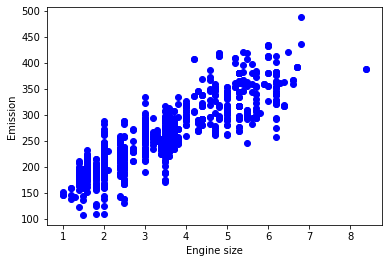

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Mutiple Linear Regression 

In [6]:
msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]
test = cdf[~msk]

regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

r2 =regr.score(x,y)
adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
print('Adjusted R2:', adj_r2)

RSS = np.mean((y_hat - y) ** 2)
hat_sigma_sqaured = (1/(train.shape[0]-train.shape[1]-1))*RSS

AIC = (1/(train.shape[0]*hat_sigma_sqaured))*(RSS+2*train.shape[1]*hat_sigma_sqaured)
print ("AIC:", AIC)

BIC = (1/(train.shape[0]*hat_sigma_sqaured)) * (RSS+ np.log(train.shape[0]) * train.shape[1] * hat_sigma_sqaured)
print ("BIC:", BIC)

Coefficients:  [[10.60453392  7.9656163   9.50027243]]
Residual sum of squares: 529.13
Variance score: 0.86
Adjusted R2: 0.8622772459580754
AIC: 1.0057670126874279
BIC: 1.038743060969646


Ridge Regression

In [7]:
regr_ridge = linear_model.Ridge(alpha =0.5)

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr_ridge.fit (x, y)

print ('Coefficients: ', regr_ridge.coef_)
print ('Intercept:', regr_ridge.intercept_)

y_hat= regr_ridge.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr_ridge.score(x, y))

r2 =regr_ridge.score(x,y)
adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
print('Adjusted R2:', adj_r2)

RSS = np.mean((y_hat - y) ** 2)

hat_sigma_sqaured = (1/(train.shape[0]-train.shape[1]-1))*RSS

AIC = (1/(train.shape[0]*hat_sigma_sqaured))*(RSS+2*train.shape[1]*hat_sigma_sqaured)
print ("AIC:", AIC)

BIC = (1/(train.shape[0]*hat_sigma_sqaured)) * (RSS+  np.log(train.shape[0]) * train.shape[1] * hat_sigma_sqaured)
print ("BIC:", BIC)

Coefficients:  [[10.59072634  7.9717337   9.50193409]]
Intercept: [65.06254588]
Residual sum of squares: 529.13
Variance score: 0.86
Adjusted R2: 0.8622774915855876
AIC: 1.0057670126874279
BIC: 1.038743060969646


Ridge Regression lamda decision by cross-validation

In [8]:
regr_RidgeCV = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr_RidgeCV.fit (x, y)

print("regr_RidgeCV returns to the best lamda:", regr_RidgeCV.alpha_)
print()

regr_ridge = linear_model.Ridge(alpha =10.0)

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr_ridge.fit (x, y)

print ('Coefficients: ', regr_ridge.coef_)
print ('Intercept:', regr_ridge.intercept_)

regr_RidgeCV returns to the best lamda: 10.0

Coefficients:  [[10.34535864  8.07727346  9.53214893]]
Intercept: [64.92110182]


In [9]:
regr_ridge = linear_model.Ridge(alpha =10.0)

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr_ridge.fit (x, y)

print ('Coefficients: ', regr_ridge.coef_)
print ('Intercept:', regr_ridge.intercept_)

y_hat= regr_ridge.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr_ridge.score(x, y))

r2 =regr_ridge.score(x,y)
adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
print('Adjusted R2:', adj_r2)

RSS = np.mean((y_hat - y) ** 2)

hat_sigma_sqaured = (1/(train.shape[0]-train.shape[1]-1))*RSS

AIC = (1/(train.shape[0]*hat_sigma_sqaured))*(RSS+2*train.shape[1]*hat_sigma_sqaured)
print ("AIC:", AIC)

BIC = (1/(train.shape[0]*hat_sigma_sqaured)) * (RSS+  np.log(train.shape[0]) * train.shape[1] * hat_sigma_sqaured)
print ("BIC:", BIC)

Coefficients:  [[10.34535864  8.07727346  9.53214893]]
Intercept: [64.92110182]
Residual sum of squares: 529.12
Variance score: 0.86
Adjusted R2: 0.8622803803745728
AIC: 1.005767012687428
BIC: 1.0387430609696462


LASSO

In [10]:
regr_lasso = linear_model.Lasso(alpha =0.1)

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr_lasso.fit (x, y)

print ('Coefficients: ', regr_lasso.coef_)
print ('Intercept:', regr_lasso.intercept_)

y_hat= regr_lasso.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr_lasso.score(x, y))

r2 =regr_lasso.score(x,y)
adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
print('Adjusted R2:', adj_r2)

RSS = np.mean((y_hat - y) ** 2)

hat_sigma_sqaured = (1/(train.shape[0]-train.shape[1]-1))*RSS

AIC = (1/(train.shape[0]*hat_sigma_sqaured))*(RSS+2*train.shape[1]*hat_sigma_sqaured)
print ("AIC:", AIC)

BIC = (1/(train.shape[0]*hat_sigma_sqaured)) * (RSS+  np.log(train.shape[0]) * train.shape[1] * hat_sigma_sqaured)
print ("BIC:", BIC)

Coefficients:  [10.45746944  8.00424823  9.52515849]
Intercept: [65.05064344]
Residual sum of squares: 7301.46
Variance score: 0.86
Adjusted R2: 0.8623058453428447
AIC: 1.0057670126874279
BIC: 1.0387430609696462


In [11]:
regr_LassoCV = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr_LassoCV.fit (x, y)

print("regr_LassoCV best lamda is:", regr_LassoCV.alpha_)

regr_LassoCV best lamda is: 1e-06


In [12]:
regr_lasso = linear_model.Lasso(alpha =1e-06)

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr_lasso.fit (x, y)

print ('Coefficients: ', regr_lasso.coef_)
print ('Intercept:', regr_lasso.intercept_)

y_hat= regr_lasso.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr_lasso.score(x, y))

r2 =regr_lasso.score(x,y)
adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
print('Adjusted R2:', adj_r2)

RSS = np.mean((y_hat - y) ** 2)

hat_sigma_sqaured = (1/(train.shape[0]-train.shape[1]-1))*RSS

AIC = (1/(train.shape[0]*hat_sigma_sqaured))*(RSS+2*train.shape[1]*hat_sigma_sqaured)
print ("AIC:", AIC)

BIC = (1/(train.shape[0]*hat_sigma_sqaured)) * (RSS+  np.log(train.shape[0]) * train.shape[1] * hat_sigma_sqaured)
print ("BIC:", BIC)

Coefficients:  [10.60453951  7.96561314  9.50027177]
Intercept: [65.07110069]
Residual sum of squares: 7308.30
Variance score: 0.86
Adjusted R2: 0.8622772465657929
AIC: 1.0057670126874279
BIC: 1.0387430609696462


***Bayesian Ridge Regression***
- many believes this would return the best outcomes 

In [13]:
regr_bayesian_ridge = linear_model.BayesianRidge()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr_bayesian_ridge.fit (x, y)

print ('Coefficients: ', regr_bayesian_ridge.coef_)
print ('Intercept:', regr_bayesian_ridge.intercept_)

y_hat= regr_bayesian_ridge.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr_bayesian_ridge.score(x, y))

r2 =regr_bayesian_ridge.score(x,y)
adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
print('Adjusted R2:', adj_r2)

RSS = np.mean((y_hat - y) ** 2)

hat_sigma_sqaured = (1/(train.shape[0]-train.shape[1]-1))*RSS

AIC = (1/(train.shape[0]*hat_sigma_sqaured))*(RSS+2*train.shape[1]*hat_sigma_sqaured)
print ("AIC:", AIC)

BIC = (1/(train.shape[0]*hat_sigma_sqaured)) * (RSS+  np.log(train.shape[0]) * train.shape[1] * hat_sigma_sqaured)
print ("BIC:", BIC)

Coefficients:  [10.44082005  8.03694991  9.52023489]
Intercept: 64.9736916821243
Residual sum of squares: 7303.21
Variance score: 0.86
Adjusted R2: 0.8622795867286912
AIC: 1.0057670126874279
BIC: 1.038743060969646
